# Лабораторная работа №1

Подключение библиотек

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer

Чтение данных фильмов из файла

In [22]:
movies_raw = pd.read_csv("./tmdb_5000_movies.csv")
movies_raw.tail(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4802,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-08-05,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16


Чтение дополнительных данных

In [23]:
credits_raw = pd.read_csv("./tmdb_5000_credits.csv")
credits_raw.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


Переименование признака "movie_id" в "id" для дальнейшего слияния датасетов

In [24]:
credits = credits_raw.rename(columns={"movie_id": "id"})
credits.tail(3)

,id,title,cast,crew
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."
4802,25975,My Date with Drew,"[{""cast_id"": 3, ""character"": ""Herself"", ""credi...","[{""credit_id"": ""58ce021b9251415a390165d9"", ""de..."


Слияние датаестов в один

In [25]:
joined_data = movies_raw.merge(credits, how='inner', on=["id", "title"])
joined_data.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


Статистическая информация о новыом датасете

In [26]:
joined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [27]:
joined_data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


Отбрасывание лишних свойств

In [28]:
movies = movies_raw.drop(axis=1, columns=["genres", "homepage", "keywords", "original_title", "overview", "production_companies", "production_countries", "spoken_languages", "tagline"])
movies.head(5)

,budget,id,original_language,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count
0,237000000,19995,en,150.437577,2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800
1,300000000,285,en,139.082615,2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,206647,en,107.376788,2015-10-26,880674609,148.0,Released,Spectre,6.3,4466
3,250000000,49026,en,112.312950,2012-07-16,1084939099,165.0,Released,The Dark Knight Rises,7.6,9106
4,260000000,49529,en,43.926995,2012-03-07,284139100,132.0,Released,John Carter,6.1,2124


Группировка содержимого по оригинальному языку и вычисление среднего арифметического сборов для каждой группы

In [29]:
movies.groupby(['original_language'])['revenue'].mean().sort_values(ascending=False).head(10)

original_language
te    1.000000e+08
en    8.647885e+07
ja    6.602892e+07
xx    5.526056e+07
zh    4.173498e+07
cn    3.374016e+07
da    2.989889e+07
ko    2.535645e+07
es    1.865218e+07
de    1.396191e+07
Name: revenue, dtype: float64

In [30]:
movies.describe().drop(axis=1, columns=["id", "popularity", "vote_average"])

,budget,revenue,runtime,vote_count
count,4.803000e+03,4.803000e+03,4801.000000,4803.000000
mean,2.904504e+07,8.226064e+07,106.875859,690.217989
std,4.072239e+07,1.628571e+08,22.611935,1234.585891
min,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,7.900000e+05,0.000000e+00,94.000000,54.000000
50%,1.500000e+07,1.917000e+07,103.000000,235.000000
75%,4.000000e+07,9.291719e+07,118.000000,737.000000
max,3.800000e+08,2.787965e+09,338.000000,13752.000000


Вывод гистограммы зависимости рейтинга от фильма

Text(0.5, 1.0, 'Rating bar')

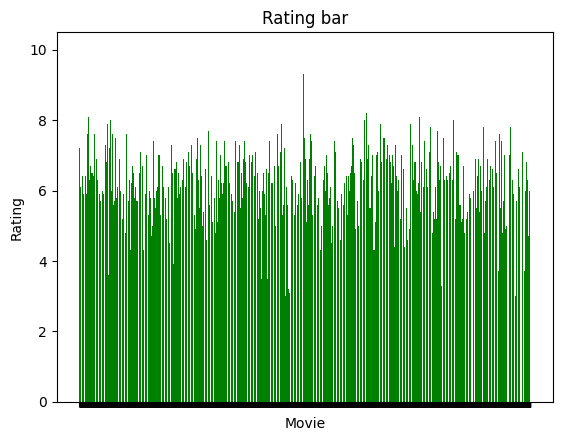

In [31]:
fig, ax = plt.subplots()

rating = movies["vote_average"].to_list()

ax.bar(list(range(len(rating))), rating, color='green', tick_label="")
ax.set_ylabel('Rating')
ax.set_xlabel('Movie')
ax.set_title('Rating bar')

Вывод точечного графика зависимости бюджета от сборов

C:\Users\admin\AppData\Local\Temp\ipykernel_1936\1676766923.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies_ =  movies_[movies.revenue != 0]


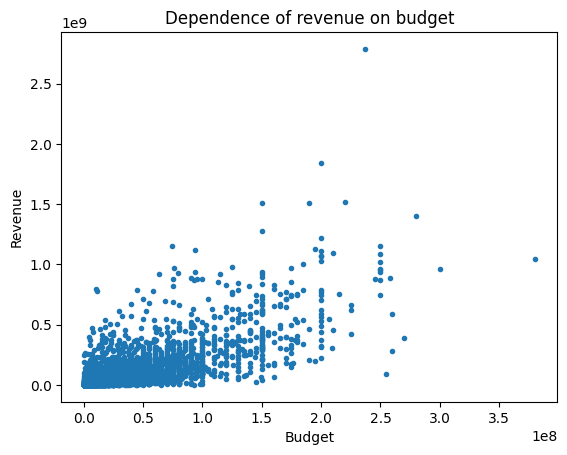

In [32]:
fig, ax = plt.subplots()
movies_ = movies[movies.budget != 0]
movies_ =  movies_[movies.revenue != 0]
budget = movies_['budget'].to_list()
revenue = movies_['revenue'].to_list()

ax.set_title('Dependence of revenue on budget')
ax.set_ylabel('Revenue')
ax.set_xlabel('Budget')
ax.scatter(budget, revenue, marker='.')

Вывод скрипичного графика средней оценки

<AxesSubplot: >

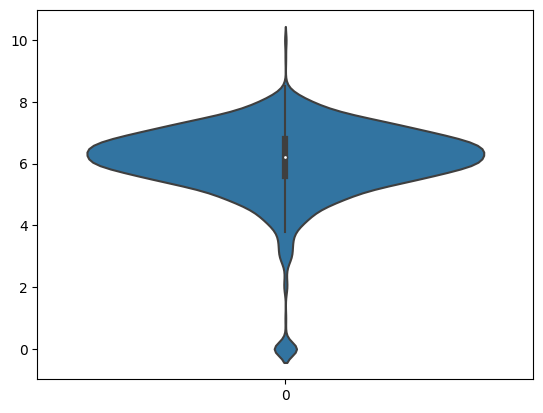

In [33]:

sb.violinplot(movies["vote_average"])

Отобросим оставшиеся строковые свойства и id для построения корреляционной матрицы и вывода тепловой карты

In [41]:
movies_num = movies.drop(axis=1, columns=['original_language', 'release_date', 'status', 'title', 'id'])
movies_num_norm = pd.DataFrame(preprocessing.normalize(movies_num.dropna(), axis=0), columns=movies_num.columns)

In [35]:
corr_matrix = movies_num_norm.corr(method='pearson')
corr_matrix

,budget,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.505346,0.730798,0.269851,0.092728,0.593135
popularity,0.505346,1.000000,0.644677,0.225502,0.274171,0.778098
revenue,0.730798,0.644677,1.000000,0.251093,0.197286,0.781462
runtime,0.269851,0.225502,0.251093,1.000000,0.375046,0.271944
vote_average,0.092728,0.274171,0.197286,0.375046,1.000000,0.313423
vote_count,0.593135,0.778098,0.781462,0.271944,0.313423,1.000000


<AxesSubplot: >

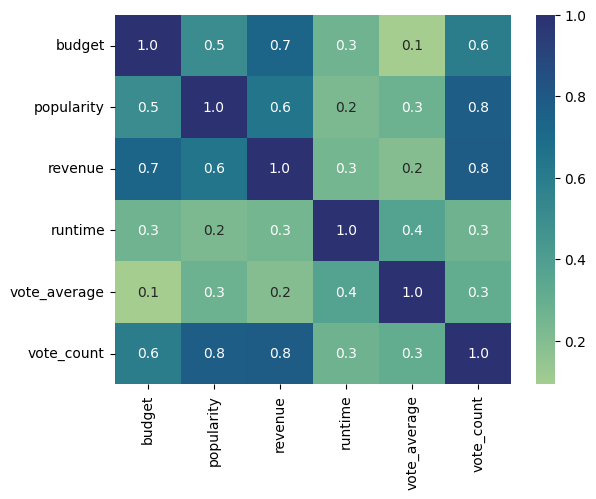

In [36]:
sb.heatmap(data=corr_matrix, annot=True, fmt=".1f", cmap="crest")

Оставим только те свойства, которые слабо коррелируют между собой 

In [42]:
movies_num_low_corr = movies_num.drop(axis=1, columns=['vote_count', 'revenue'])
movies_num_low_corr

,budget,popularity,runtime,vote_average
0,237000000,150.437577,162.0,7.2
1,300000000,139.082615,169.0,6.9
2,245000000,107.376788,148.0,6.3
3,250000000,112.312950,165.0,7.6
4,260000000,43.926995,132.0,6.1
...,...,...,...,...
4798,220000,14.269792,81.0,6.6
4799,9000,0.642552,85.0,5.9
4800,0,1.444476,120.0,7.0
4801,0,0.857008,98.0,5.7


<AxesSubplot: >

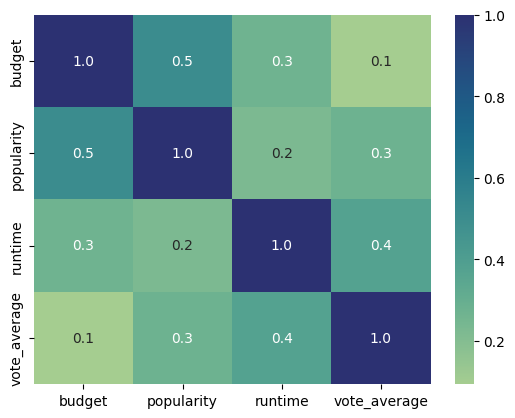

In [43]:
corr_matrix = movies_num_low_corr.corr(method='pearson')
sb.heatmap(data=corr_matrix, annot=True, fmt=".1f", cmap="crest")